In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
data=pd.read_csv(r"C:\CODING\SHIASH\projects\Car price prediction\car.csv")

In [33]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [35]:
data.isna().sum().sum()

878

In [36]:
for i in data.select_dtypes(["float64"]).columns:
    if data[i].skew()>0.5:
        data[i]=data[i].fillna(data[i].median())
    else:
        data[i]=data[i].fillna(data[i].mean())

In [37]:
data.isna().sum().sum()

215

In [38]:
data=data.dropna()

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data:
    if data[i].dtypes=="object":
        data[i]=le.fit_transform(data[i])

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


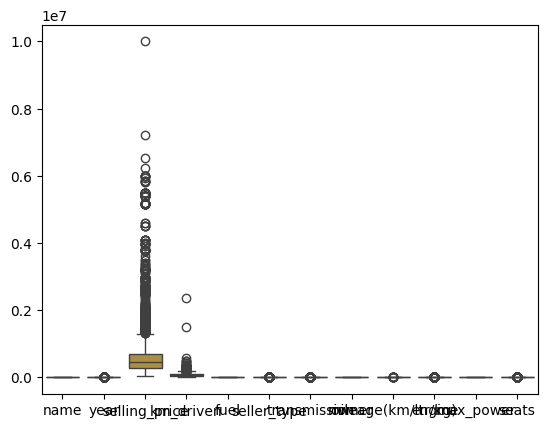

In [40]:
sns.boxplot(data)
print(data.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'name'),
  Text(1, 0, 'year'),
  Text(2, 0, 'selling_price'),
  Text(3, 0, 'km_driven'),
  Text(4, 0, 'fuel'),
  Text(5, 0, 'seller_type'),
  Text(6, 0, 'transmission'),
  Text(7, 0, 'owner'),
  Text(8, 0, 'mileage(km/ltr/kg)'),
  Text(9, 0, 'engine'),
  Text(10, 0, 'max_power'),
  Text(11, 0, 'seats')])

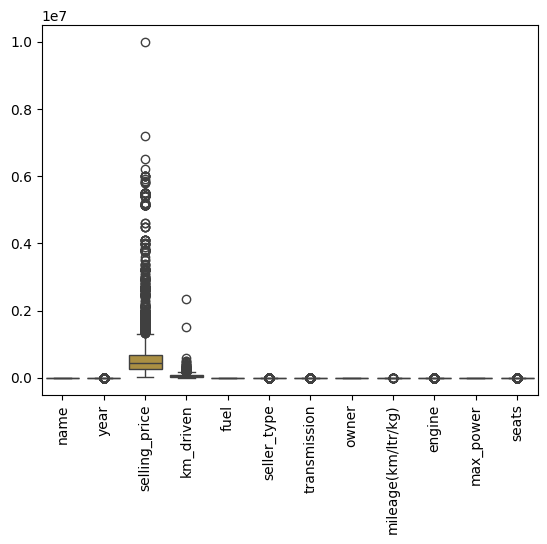

In [41]:
sns.boxplot(data)
print(data.columns)
plt.xticks(rotation="vertical")

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in data.columns:
    if (data[i].dtypes!="object") & (i!="selling_price"):
        var_inflation.append(i)
x=data[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,name,4.941572
1,year,247.047100
2,km_driven,3.162820
3,fuel,9.254483
4,seller_type,6.713791
5,transmission,10.552076
6,owner,1.652226
7,mileage(km/ltr/kg),60.141097
8,engine,32.724565
9,max_power,8.143657


In [43]:
data=data.drop(["year"],axis=1)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in data.columns:
    if (data[i].dtypes!="object") & (i!="selling_price"):
        var_inflation.append(i)
x=data[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,name,4.897586
1,km_driven,3.133289
2,fuel,4.722124
3,seller_type,6.706444
4,transmission,10.359911
5,owner,1.603822
6,mileage(km/ltr/kg),20.005313
7,engine,21.059014
8,max_power,8.107846
9,seats,51.149646


In [45]:
data=data.drop(["seats"],axis=1)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in data.columns:
    if (data[i].dtypes!="object") & (i!="selling_price"):
        var_inflation.append(i)
x=data[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,name,4.852698
1,km_driven,3.118242
2,fuel,4.354487
3,seller_type,6.648690
4,transmission,8.891915
5,owner,1.603684
6,mileage(km/ltr/kg),18.598674
7,engine,6.429717
8,max_power,8.100778


In [47]:
y=data["selling_price"]

In [48]:
x

,name,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power
0,1250,145500,1,1,1,0,23.40,1248.0,244
1,1547,120000,1,1,1,2,21.14,1498.0,15
2,375,140000,3,1,1,4,17.70,1497.0,253
3,743,127000,1,1,1,0,23.00,1396.0,295
4,1291,120000,3,1,1,0,16.10,1298.0,287
...,...,...,...,...,...,...,...,...,...
8123,733,110000,3,1,1,0,18.50,1197.0,267
8124,618,119000,1,1,1,1,16.80,1493.0,30
8125,1262,120000,1,1,1,0,19.30,1248.0,241
8126,1634,25000,1,1,1,0,23.57,1396.0,232


In [49]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7913, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6330, 9)
(1583, 9)
(6330,)
(1583,)


In [51]:
from sklearn.linear_model import LinearRegression
car_model=LinearRegression()
car_model.fit(x_train,y_train)

LinearRegression()

In [52]:
pred=car_model.predict(x_test)
pred

array([ 588771.16911948, 1201814.8708528 ,  461228.27589951, ...,
        818165.83788165,  719214.81373343,  818906.23889783])

In [53]:
from sklearn.metrics import *
accuracy=r2_score(y_test,pred)
accuracy*100

53.55453965195489

In [54]:
from sklearn.tree import DecisionTreeRegressor
de_car_model=DecisionTreeRegressor()
de_car_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [55]:
pred=de_car_model.predict(x_test)

In [56]:
accuracy=r2_score(y_test,pred)
accuracy*100

90.43827478782438

In [57]:
x_train

,name,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power
2297,793,50000,1,1,1,0,15.96,2523.0,206
5429,666,90000,3,1,1,4,20.36,1197.0,255
7297,596,80000,1,1,1,0,23.90,1582.0,62
7990,1647,50000,1,1,1,2,25.00,1396.0,231
4285,1014,100000,3,1,1,2,16.10,796.0,172
...,...,...,...,...,...,...,...,...,...
5067,1289,123000,3,1,1,0,18.60,1197.0,280
3360,1893,100000,1,0,1,0,13.68,2393.0,84
1699,574,77000,3,1,1,0,17.92,1086.0,206
2688,465,27000,1,1,1,0,21.38,1396.0,289


In [58]:
y_train

2297     500000
5429     170000
7297     600000
7990     250000
4285      70000
         ...   
5067     328000
3360    1475000
1699     150000
2688    1050000
2815     525000
Name: selling_price, Length: 6330, dtype: int64

In [60]:
de_car_model.predict([[793,	50000,	1,	1	,1,	0,	15.96,	2523.0,	206]])

C:\Users\sundh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([476666.66666667])